In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import textract
from konlpy.tag import *
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import csv
%matplotlib inline

In [2]:
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)

In [3]:
twitter = Okt()

text = ""
morphs = []

df = pd.read_csv('answers.csv', encoding='UTF8')
df['created_at'] = pd.to_datetime(df['created_at'])
# df = df[(df.author_id != 5)]

In [4]:
start_date = pd.Timestamp(2019, 1, 28, 0)
end_date = pd.Timestamp(2019, 4, 1, 0)

mask = (df['created_at'] > start_date) & (df['created_at'] <= end_date)
df = df.loc[mask]

df.head()

,id,author_id,content,tag_string,created_at,updated_at
0,1,4,우우웅궁궁궁\r\nfdfsfsfㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㄹㄴㄹㄴㄹㅇㅇㅇㅇㅇㅇㅇㅇ,NaN,2019-01-28 07:20:21.700798,2019-01-28 08:08:43.152843
7,10,4,요즘은 앱이 대세라지만 어도어를 쓰다보니까 웹의 장점이 확 느껴진다. \r\n확실히...,NaN,2019-01-28 16:02:58.548841,2019-01-28 16:02:58.548841
9,14,6,초대장을 받았다! 컴퓨터와 철학의 조화????\r\n코드카데미 c++ 멍청한 나와 ...,NaN,2019-01-30 16:00:48.039235,2019-01-30 16:00:48.039235
10,17,2,모든 사람이 너무너무너무너무너무 열심히 한 하루다\r\n우리는 왜이렇게 열심히 할까...,NaN,2019-02-01 16:19:10.165247,2019-02-01 16:19:10.165247
11,18,4,맥주먹고 자려했으나 어도어가 눈에밟혀 못자겠다\r\n\r\n후후후후훟후후훟,NaN,2019-02-01 16:30:53.212117,2019-02-01 16:31:48.865562


In [5]:
content = df.content

for row in content:
    text = row
    if not pd.isna(text):
        morphs.append(twitter.pos(text))

In [6]:
print(morphs)

[[('우', 'Adverb'), ('우웅', 'Exclamation'), ('궁궁궁', 'Noun'), ('\r\n', 'Foreign'), ('fdfsfsf', 'Alpha'), ('ㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㅇㄹㄴㄹㄴㄹㅇㅇㅇㅇㅇㅇㅇㅇ', 'KoreanParticle')], [('요즘', 'Noun'), ('은', 'Josa'), ('앱', 'Noun'), ('이', 'Josa'), ('대', 'Modifier'), ('세라', 'Noun'), ('지만', 'Josa'), ('어도', 'Noun'), ('어', 'Suffix'), ('를', 'Josa'), ('쓰다', 'Verb'), ('보', 'Noun'), ('니까', 'Josa'), ('웹', 'Noun'), ('의', 'Josa'), ('장점', 'Noun'), ('이', 'Josa'), ('확', 'Noun'), ('느껴진다', 'Verb'), ('.', 'Punctuation'), ('확실히', 'Adjective'), ('글', 'Noun'), ('을', 'Josa'), ('한', 'Verb'), ('번', 'Noun'), ('쓰기', 'Noun'), ('시작', 'Noun'), ('하면', 'Verb'), ('앱', 'Noun'), ('보다', 'Josa'), ('웹', 'Noun'), ('으로', 'Josa'), ('쓰는게', 'Verb'), ('훠', 'Noun'), ('어어어어', 'Noun'), ('어어어어', 'Noun'), ('ㅓ', 'KoreanParticle'), ('어어어어', 'Noun'), ('얼씬', 'Noun'), ('\r\n', 'Foreign'), ('더', 'Noun'), ('편하다', 'Adjective'), ('.', 'Punctuation'), ('모바일', 'Noun'), ('은', 'Josa'), ('타자', 'Noun'), ('치기', 'Noun'), ('가', 'Josa'), ('너무', 'Adverb'), ('불편해서', 'Adjective'), ('

In [7]:
noun_adj_adv_list=[]
 
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("그" not in word) and ("수"not in word) and("게"not in word)and("말"not in word)and("거" not in word):
            noun_adj_adv_list.append(word)

In [8]:
print(noun_adj_adv_list)

['궁궁궁', '요즘', '앱', '세라', '어도', '보', '웹', '장점', '확', '글', '번', '쓰기', '시작', '앱', '웹', '훠', '어어어어', '어어어어', '어어어어', '얼씬', '더', '모바일', '타자', '치기', '글', '경향', '웹', '뭔가', '다다다', '키', '보드', '또', '계속', '맛', '초대장', '컴퓨터', '철학', '조화', '코드카데미', '폴', '리오', '모든', '사람', '하루', '우리', '왜', '지금', '페이지', '맥주', '어도', '눈', '훟후후훟', '지금', '모바일', '버전', '이제', '뿌듯띠', '모바일', '글쓰기', '도전', '지금', '파전', '오늘', '하루', '종일', '사과', '개', '키위', '반개', '레드', '향', '쪽', '배', '지금', '여행', '계획', '저', '롤럴루', '입문', '화장실', '지금', '가입', '염', '오늘', '통학', '절대', '절대', '생강', '만해', '악몽', '잠', '한자', '공부', '몇', '시간', '전', '사랑방', '이', '이', '사실', '막', '곤혹', '움', '어도', '공개', '공개', '공개', '진짜', '짱', '염', '시간', '돈', '여행가', '곳', '지금', '서랍', '유', '유', '마이', '묵', '묵', '지굼', '세상', '제일', '졸리', '스터디', '뻔', '회의', '머리', '뻔', '또한', '기분', '사람', '평가', '스트레스', '사람', '다른', '각자', '방식', '왜', '줄', '참으로', '온갖', '생각', '긴장', '어도', '테', '스팅', '매일', '노티', '혹시', '노티', '경우', '생각', '시시각각', '우리', '관계', '속', '노티', '변화', '흐름', '상상', '노티', '때', '노티', '때', '노티', '때', '노티', '브

In [9]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
words

{'사람': 12,
 '오늘': 12,
 '어도': 11,
 '지금': 11,
 '우리': 10,
 '노티': 10,
 '때': 10,
 '마음': 8,
 '시간': 7,
 '언니': 7,
 '하루': 6,
 '이': 6,
 '앱': 5,
 '글': 5,
 '더': 5,
 '저': 5,
 '사실': 5,
 '생각': 5,
 '일': 5,
 '고민': 5,
 '건': 5,
 '집': 5,
 '매우': 5,
 '이제': 4,
 '진짜': 4,
 '매일': 4,
 '가장': 4,
 '술': 4,
 '안': 4,
 '웹': 3,
 '어어어어': 3,
 '모바일': 3,
 '뭔가': 3,
 '왜': 3,
 '눈': 3,
 '공개': 3,
 '머리': 3,
 '또한': 3,
 '기분': 3,
 '다른': 3,
 '좀': 3,
 '꼭': 3,
 '팀': 3,
 '걱정': 3,
 '하늘': 3,
 '위': 3,
 '걸': 3,
 '끝': 3,
 '아주': 3,
 '순간': 3,
 '자신': 3,
 '피': 3,
 '어제': 3,
 '때문': 3,
 '해결': 3,
 '밤': 3,
 '화상': 3,
 '달': 3,
 '사용': 3,
 '영상': 3,
 '번': 2,
 '또': 2,
 '계속': 2,
 '맛': 2,
 '모든': 2,
 '버전': 2,
 '개': 2,
 '배': 2,
 '염': 2,
 '절대': 2,
 '만해': 2,
 '공부': 2,
 '막': 2,
 '유': 2,
 '묵': 2,
 '뻔': 2,
 '방식': 2,
 '줄': 2,
 '경우': 2,
 '속': 2,
 '한시': 2,
 '의미': 2,
 '데': 2,
 '갑자기': 2,
 '더욱': 2,
 '점': 2,
 '사람인': 2,
 '동안': 2,
 '등': 2,
 '표현': 2,
 '일기': 2,
 '행복': 2,
 '느낌': 2,
 '익명': 2,
 '피드': 2,
 '알': 2,
 '간다': 2,
 '중': 2,
 '박사': 2,
 '선배': 2,
 '일이': 2,
 '친구': 2,
 '휴식': 2

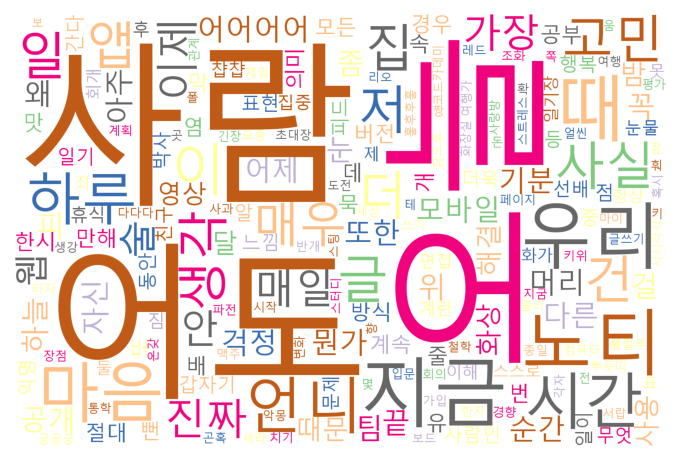

In [10]:
wordcloud = WordCloud(font_path = '../../Fonts/malgun.ttf', background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()